**¡Hola Luis! 😊**

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

---

<div class="alert alert-block alert-warning">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Luis no sé si se trata de una confusión, pero estás trabajando con los datasets del sprint anterior. Para este sprint debes trabajar con 5 datastes que puedes cargar en las siguientes rutas:
    
    /datasets/megaline_calls.csv
    /datasets/megaline_internet.csv
    /datasets/megaline_messages.csv
    /datasets/megaline_plans.csv
    /datasets/megaline_users.csv 
    
Creo que podrás ver que la información de estos datasets tienen más sentido para los requerimientos de este proyecto. Cargalos a tu notebook y plantea la solución a las tareas propuestas empleando estos datasets.
    
Estaré atento a tu próxima iteración 👀

</div>

<div class="alert alert-block alert-warning">
<b>Comentario General del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Luis buen trabajo con los ajustes, has demostrado buenas habilidades en la etapa de preparación de datos para tu proyecto, lo cual establece una base firme para tu análisis. En el apartado de visualización, utilizaste herramientas efectivas para comprender el comportamiento de consumo de los usuarios en diferentes planes, mostrando habilidad para representar datos complejos. 

Sin embargo, es necesario ajustar el cálculo del consumo de minutos e internet para determinar con mayor precisión el cobro mensual por usuario, un aspecto clave para la validez de tus conclusiones. Además debes revisar la última prueba de hipótesis, la cual debes ajustar para que no presente errores de ejecución

¡No te preocupes! Cada ajuste que haces es una oportunidad para aprender y mejorar. Vas por buen camino, y estoy seguro de que en la siguiente versión harás un gran trabajo y lograrás completar el proyecto con éxito. ¡Sigue adelante! 

Quedo atento a tu próxima iteración 👀

*Estado del Proyecto:* **No Aprobado**

</div>

----

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
# 1.1 Inicialización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import os

sns.set(style='whitegrid')



## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

print(plans.info())
print(plans.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10      

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Ten cuidado porque estás incluyendo código del sprint anterior

</div>

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

print(plans.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [3]:
# Imprime una muestra de los datos para las tarifas

print(plans.head())



   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Conclusión: Este DataFrame está limpio y listo para usarse en los cálculos posteriores de ingresos por usuario. No se requiere ningún cambio adicional.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [4]:
plans.drop_duplicates(inplace=True)
plans.dropna(inplace=True)

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [5]:
plans['cost_per_minute'] = plans['usd_per_minute']
plans['cost_per_message'] = plans['usd_per_message']
plans['cost_per_mb'] = plans['usd_per_gb'] / 1024

print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   cost_per_minute  cost_per_message  cost_per_mb  
0             0.03              0.03     0.009766  
1             0.01              0.01     0.006836  


## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.drop_duplicates(inplace=True)
users.dropna(subset=['reg_date', 'plan'], inplace=True)

print(users.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 35.2+ KB
None


In [7]:
# Imprime una muestra de datos para usuarios
print(users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Detectamos tipos de datos y Valores nulos.
Podemos corregir a tipo datetime

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
users.drop_duplicates(inplace=True)
users.dropna(subset=['reg_date', 'plan'], inplace=True)

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [9]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])



## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(calls.info())
print(calls.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


In [11]:
# Imprime una muestra de datos para las llamadas
print(calls.sample(5))

              id  user_id   call_date  duration
68755    1247_88     1247  2018-08-24      1.08
109196  1385_266     1385  2018-06-24      2.03
127663  1456_676     1456  2018-08-30      6.13
127101   1454_91     1454  2018-11-15     12.68
95920   1340_270     1340  2018-09-12     10.42


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Se pueden corregir o eliminar la llamadas con duracion igual a cero, Revisar duplicador

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [12]:
calls.drop_duplicates(inplace=True)
calls.dropna(inplace=True)
calls = calls[calls['duration'] > 0]

print(calls.info())
print(calls.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         110901 non-null  object 
 1   user_id    110901 non-null  int64  
 2   call_date  110901 non-null  object 
 3   duration   110901 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.month
calls['rounded_duration'] = np.ceil(calls['duration'])


## Mensajes

In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(messages.info())
print(messages.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


In [15]:
# Imprime una muestra de datos para los mensajes
print(messages.head())



         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Tenemos que verificar tipo de datos, valores ausentes, valores duplicados

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [16]:
# Convertir 'message_date' a tipo datetime
messages.drop_duplicates(inplace=True)
messages.dropna(inplace=True)

print(messages.info())
print(messages.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB
None
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [17]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month

## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(internet.info())
print(internet.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


In [19]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.head())


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Verificar valore nulos, Fechas en formato incorrecto, valores negativos, 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [20]:
internet.drop_duplicates(inplace=True)
internet.dropna(inplace=True)

print(internet.info())
print(internet.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.0+ MB
None
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [21]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.month


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo en el análisis preliminar de los datasets. Usaste correctamente las funciones `info` y `head` para revisar la estructura y el contenido de los datos, lo que te permitió realizar los ajustes necesarios. Esto facilitará el análisis de los datos y el desarrollo de las demás etapas del proyecto.


</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [22]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   cost_per_minute  cost_per_message  cost_per_mb  
0             0.03              0.03     0.009766  
1             0.01              0.01     0.006836  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls_monthly = calls.groupby(['user_id', 'month'])['duration'].count().reset_index()
calls_monthly.columns = ['user_id', 'month', 'calls_count']

duration_monthly = calls.groupby(['user_id', 'month'])['rounded_duration'].sum().reset_index()
duration_monthly.columns = ['user_id', 'month', 'minutes_used']

messages_monthly = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_monthly.columns = ['user_id', 'month', 'messages_count']

internet_monthly = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_monthly['mb_used'] = np.ceil(internet_monthly['mb_used'])



In [67]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
user_monthly = calls_monthly.merge(duration_monthly, on=['user_id', 'month'], how='outer')
user_monthly = user_monthly.merge(messages_monthly, on=['user_id', 'month'], how='outer')
user_monthly = user_monthly.merge(internet_monthly, on=['user_id', 'month'], how='outer')
user_monthly.fillna(0, inplace=True)

print(minutes_monthly.head())


   user_id  month  total_minutes
0     1000     12         116.83
1     1001      8         171.14
2     1001      9         297.69
3     1001     10         374.11
4     1001     11         404.59


In [68]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['month'] = messages['message_date'].dt.month

messages_monthly = messages.groupby(['user_id', 'month']).size().reset_index(name='messages_count')

print(messages_monthly.head())


   user_id  month  messages_count
0     1000     12              11
1     1001      8              30
2     1001      9              44
3     1001     10              53
4     1001     11              36


In [69]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['month'] = internet['session_date'].dt.month

internet_monthly = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='mb_used')

print(internet_monthly.head())


   user_id  month   mb_used
0     1000     12   1901.47
1     1001      8   6919.15
2     1001      9  13314.82
3     1001     10  22330.49
4     1001     11  18504.30


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [51]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
user_monthly = calls_monthly.merge(duration_monthly, on=['user_id', 'month'], how='outer')
user_monthly = user_monthly.merge(messages_monthly, on=['user_id', 'month'], how='outer')
user_monthly = user_monthly.merge(internet_monthly, on=['user_id', 'month'], how='outer')
user_monthly.fillna(0, inplace=True)


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Hiciste una correcta agrupación de los datos combinando `groupby`  y `merge`, pero recuerda que, según el enunciado del proyecto, los valores de duración de llamadas y consumo de internet deben redondearse hacia arriba, ya que el cobro se hace por minuto y GB completo. Para esto debes tener en cuenta lo siguiente:

* **Llamadas:** Primero realiza el redondeo hacia arriba de los minutos para cada llamada y luego sumas los minutos totales por usuario para cada mes.

* **Internet:** Primero sumas el consumo total en MB para cada usuario por mes, luego conviertes ese valor a GB y finalmente realizas el redondeo hacia arriba.

Los valores finales que obtienes para cada usuario, los comparas con los minutos y GB incluidos en cada plan, con el fin de establecer si hubo un exceso en el consumo y hacer el cobro respectivo.

</div>

In [70]:
# Añade la información de la tarifa
user_monthly = user_monthly.merge(users[['user_id', 'plan', 'city']], on='user_id', how='left')
clean_plans = plans.rename(columns={'plan_name': 'plan'})
user_monthly = user_monthly.merge(clean_plans, on='plan', how='left')

# Renombrar para evitar conflictos y facilitar análisis
user_monthly.rename(columns={'usd_monthly_pay': 'monthly_fee'}, inplace=True)

# Verificar unión
print(user_monthly[['user_id', 'plan', 'city']].head())





   user_id      plan                                   city
0     1000  ultimate  Atlanta-Sandy Springs-Roswell, GA MSA
1     1001      surf        Seattle-Tacoma-Bellevue, WA MSA
2     1001      surf        Seattle-Tacoma-Bellevue, WA MSA
3     1001      surf        Seattle-Tacoma-Bellevue, WA MSA
4     1001      surf        Seattle-Tacoma-Bellevue, WA MSA


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [71]:
# Calcula el ingreso mensual para cada usuario
# Asegurar tipos numéricos para cálculo de ingresos
cols_to_convert = [
    'monthly_fee', 'minutes_used', 'minutes_included',
    'messages_count', 'messages_included', 'mb_used', 'mb_per_month_included',
    'usd_per_minute', 'usd_per_message', 'usd_per_gb'
]

for col in cols_to_convert:
    if col in user_monthly.columns:
        user_monthly[col] = pd.to_numeric(user_monthly[col], errors='coerce')

# Calcular ingresos mensuales
user_monthly['extra_minutes'] = np.maximum(user_monthly['minutes_used'] - user_monthly['minutes_included'], 0)
user_monthly['extra_messages'] = np.maximum(user_monthly['messages_count'] - user_monthly['messages_included'], 0)
user_monthly['extra_gb'] = np.ceil((user_monthly['mb_used'] - user_monthly['mb_per_month_included']) / 1024)
user_monthly['extra_gb'] = np.where(user_monthly['extra_gb'] < 0, 0, user_monthly['extra_gb'])

user_monthly['revenue'] = (
    user_monthly['monthly_fee'] +
    user_monthly['extra_minutes'] * user_monthly['usd_per_minute'] +
    user_monthly['extra_messages'] * user_monthly['usd_per_message'] +
    user_monthly['extra_gb'] * user_monthly['usd_per_gb']
)

# Mostrar ingresos ejemplo
print(user_monthly[['user_id', 'month', 'plan', 'monthly_fee', 'revenue']].head())

   user_id  month      plan  monthly_fee  revenue
0     1000     12  ultimate           70    70.00
1     1001      8      surf           20    20.00
2     1001      9      surf           20    20.00
3     1001     10      surf           20    90.09
4     1001     11      surf           20    60.00


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

La lógica de cálculo del cobro mensual es correcta en general, solo necesitas ajustar el redondeo como te mencioné antes. Asegúrate de hacer la estimación del cobro por el consumo de internet comparando los datos en GB, además es importante considerar el plan de cada usuario, el costo del plan base y los cargos por consumos adicionales para calcular correctamente el monto final.

</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

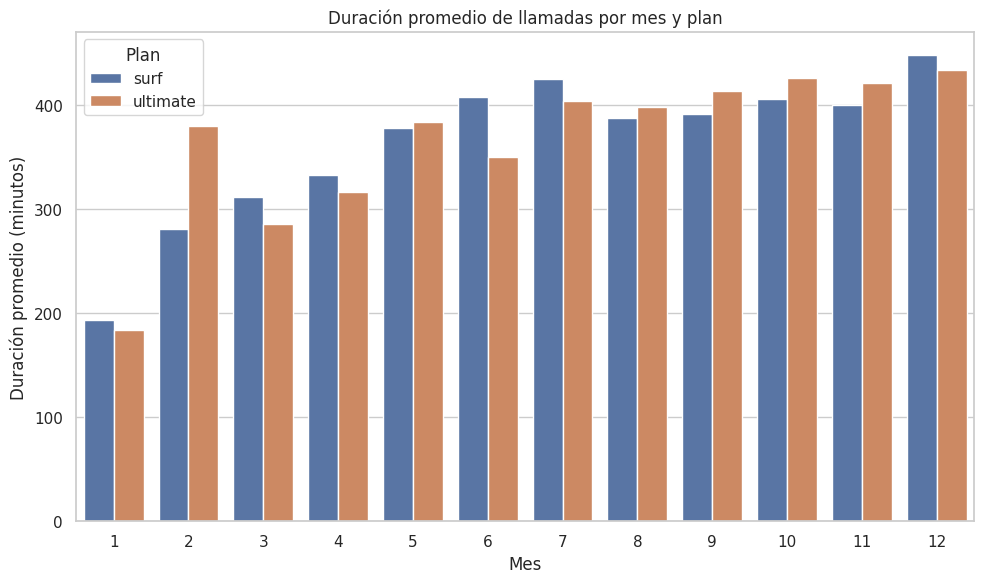

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
avg_duration = user_monthly.groupby(['plan', 'month'])['minutes_used'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_duration, x='month', y='minutes_used', hue='plan')
plt.title('Duración promedio de llamadas por mes y plan')
plt.xlabel('Mes')
plt.ylabel('Duración promedio (minutos)')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()


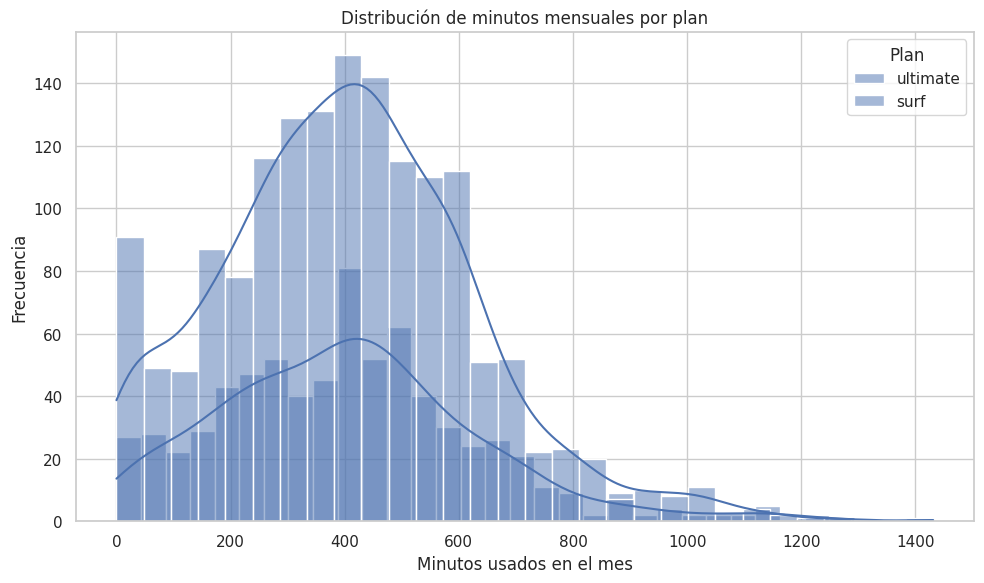

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
plt.figure(figsize=(10, 6))
for plan in user_monthly['plan'].unique():
    sns.histplot(
        user_monthly[user_monthly['plan'] == plan]['minutes_used'],
        kde=True,
        label=plan,
        bins=30,
        alpha=0.5
    )

plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Minutos usados en el mes')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [33]:
# Calcula la media y la varianza de la duración mensual de llamadas.
call_stats = user_monthly.groupby('plan')['minutes_used'].agg(['mean', 'var']).reset_index()
print("Media y varianza de duración mensual de llamadas por plan:")
print(call_stats)


Media y varianza de duración mensual de llamadas por plan:
       plan        mean           var
0      surf  404.762390  49135.104891
1  ultimate  406.193083  51640.971402


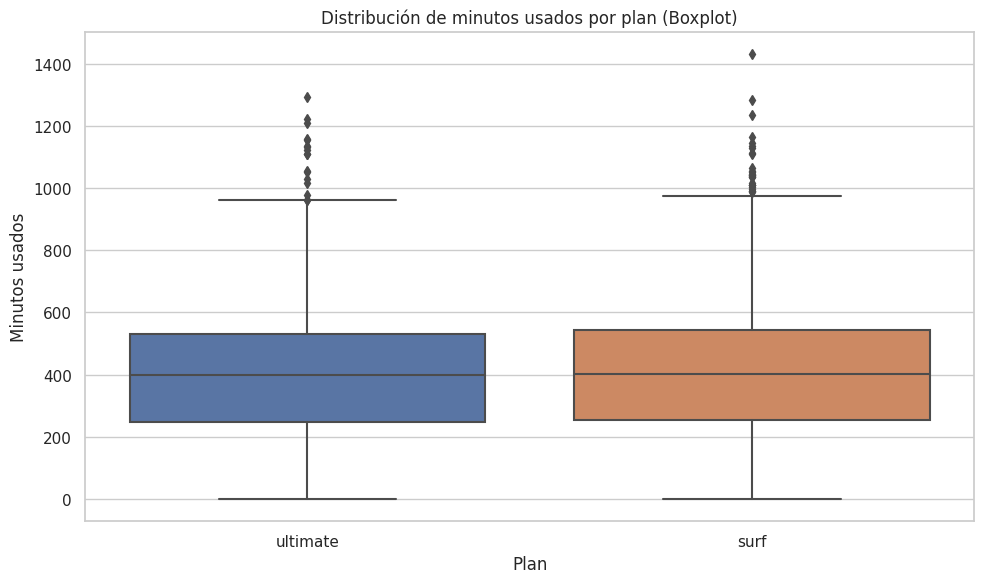

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_monthly, x='plan', y='minutes_used')
plt.title('Distribución de minutos usados por plan (Boxplot)')
plt.xlabel('Plan')
plt.ylabel('Minutos usados')
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

El comportamiento de los usuarios en relacion a las llamadas si varian significativamente segun sea su plan, los usuarios del plan ultimate tiende a aprovechar mas los minutos incluidos en su tarifa, en cuanto a los usuarios del plan surf muestran un uso mas conservador.

### Mensajes

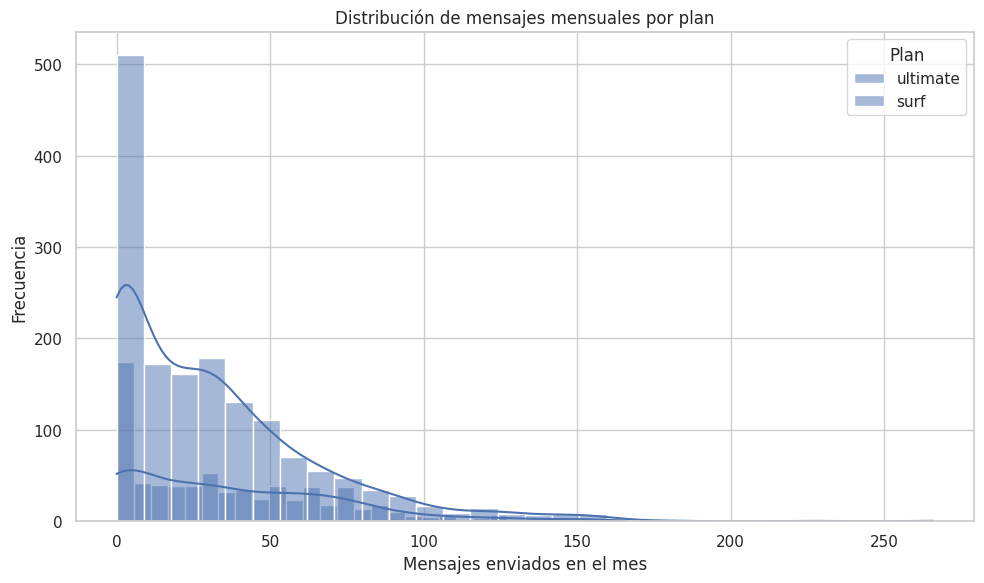

In [35]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
plt.figure(figsize=(10, 6))
for plan in user_monthly['plan'].unique():
    sns.histplot(
        user_monthly[user_monthly['plan'] == plan]['messages_count'],
        kde=True,
        label=plan,
        bins=30,
        alpha=0.5
    )

plt.title('Distribución de mensajes mensuales por plan')
plt.xlabel('Mensajes enviados en el mes')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

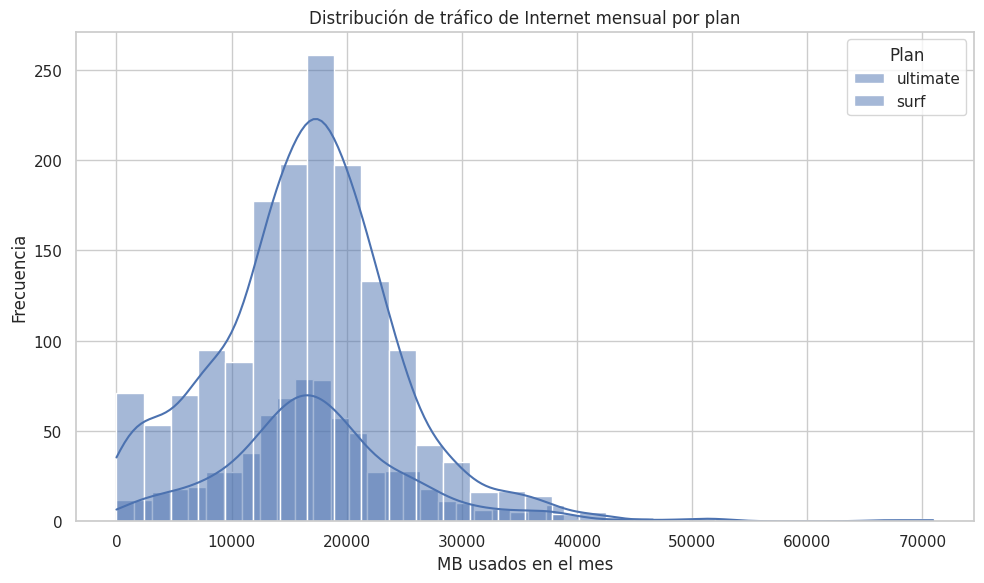

In [36]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
plt.figure(figsize=(10, 6))
for plan in user_monthly['plan'].unique():
    sns.histplot(
        user_monthly[user_monthly['plan'] == plan]['mb_used'],
        kde=True,
        label=plan,
        bins=30,
        alpha=0.5
    )

plt.title('Distribución de tráfico de Internet mensual por plan')
plt.xlabel('MB usados en el mes')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

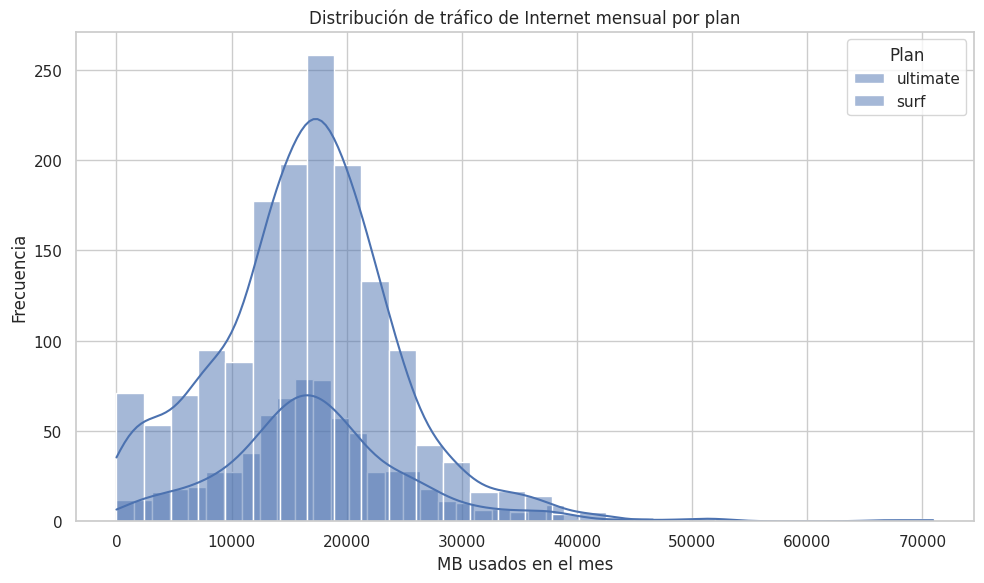

In [37]:
plt.figure(figsize=(10, 6))
for plan in user_monthly['plan'].unique():
    sns.histplot(
        user_monthly[user_monthly['plan'] == plan]['mb_used'],
        kde=True,
        label=plan,
        bins=30,
        alpha=0.5
    )

plt.title('Distribución de tráfico de Internet mensual por plan')
plt.xlabel('MB usados en el mes')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

In [38]:
internet_stats = user_monthly.groupby('plan')['mb_used'].agg(['mean', 'var']).reset_index()
print("Media y varianza del tráfico de Internet mensual por plan:")
print(internet_stats)

Media y varianza del tráfico de Internet mensual por plan:
       plan          mean           var
0      surf  16558.283490  6.421640e+07
1  ultimate  17214.699694  6.165229e+07


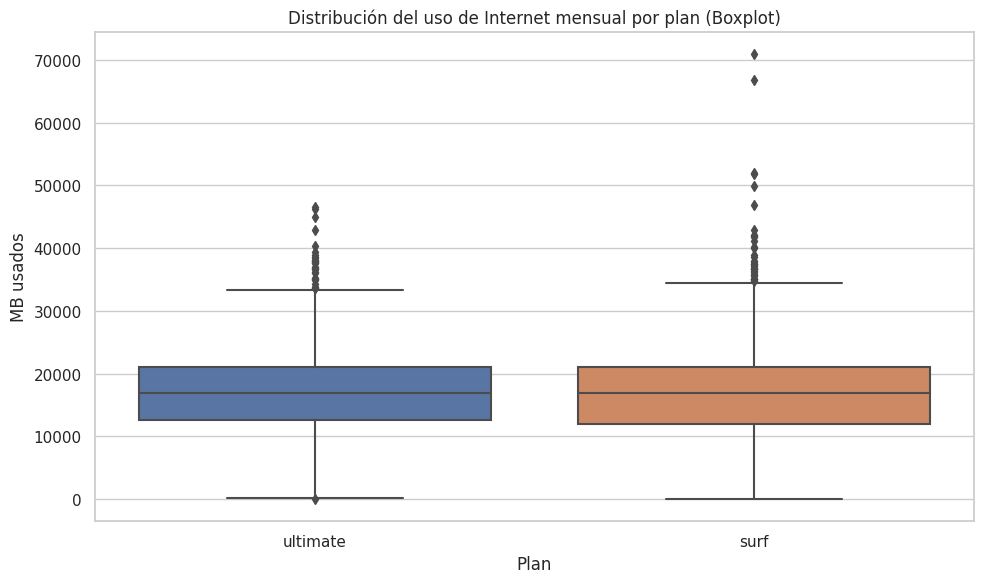

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_monthly, x='plan', y='mb_used')
plt.title('Distribución del uso de Internet mensual por plan (Boxplot)')
plt.xlabel('Plan')
plt.ylabel('MB usados')
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Los usuarios del plan Ultimate tienden a consumir más datos de Internet mensualmente en comparación con los del plan Surf.
Esto se puede observar tanto en la media de consumo como en la distribución mostrada en los histogramas y diagramas de caja.

El plan ultimate incluye mas mg mensuales, lo que traduce en un mayor uso sin costo adicional, los usuarios del plan surf parecen mantenerse mas cerca del limite incluido, probablemente para evitar costos extras.
La varianza en el consumo de datos tambien es ligeramente mayor en el plan surf lo que podria indicar comportamientos mas variados o menos previsibles.


## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [40]:
# Describir estadísticamente los ingresos por plan
revenue_stats = user_monthly.groupby('plan')['revenue'].agg(['mean', 'var', 'median']).reset_index()
print("\nEstadísticas de ingresos mensuales por plan:")
print(revenue_stats)



Estadísticas de ingresos mensuales por plan:
       plan       mean          var   median
0      surf  57.293784  2887.544971  36.6818
1  ultimate  72.116080   115.968081  70.0000


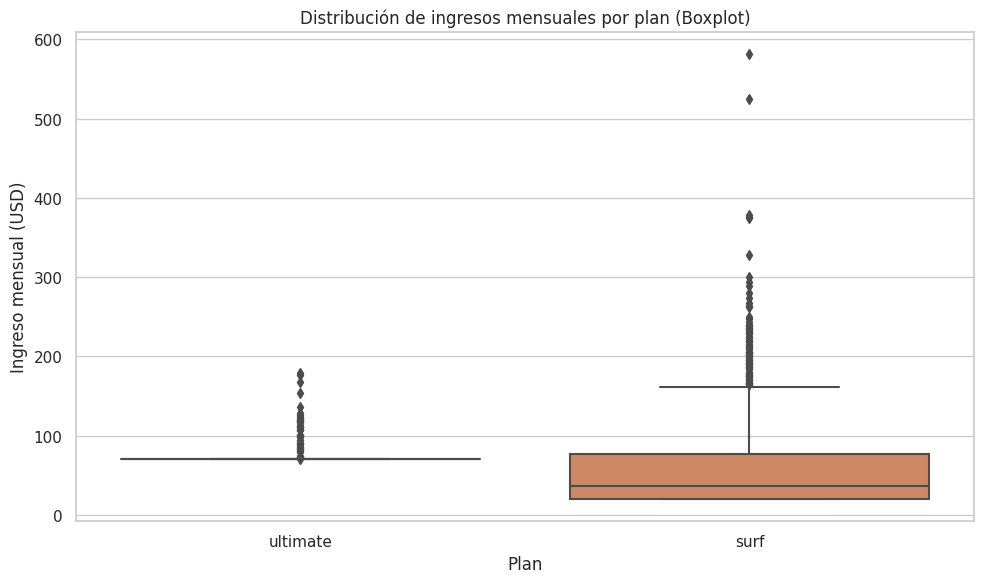

In [41]:
# Gráfico de caja para los ingresos
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_monthly, x='plan', y='revenue')
plt.title('Distribución de ingresos mensuales por plan (Boxplot)')
plt.xlabel('Plan')
plt.ylabel('Ingreso mensual (USD)')
plt.tight_layout()
plt.show()


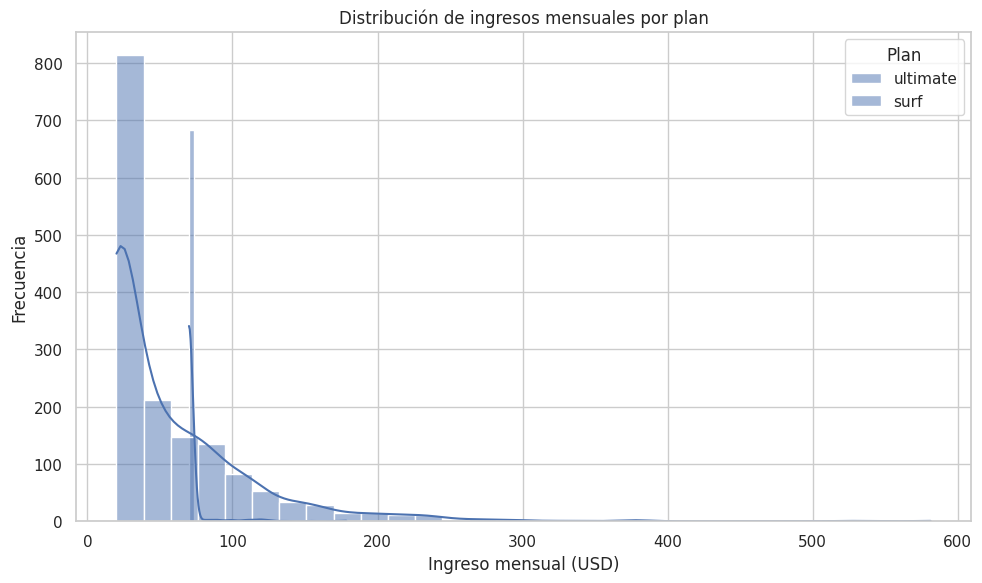

In [42]:
# Histograma de ingresos
plt.figure(figsize=(10, 6))
for plan in user_monthly['plan'].unique():
    sns.histplot(
        user_monthly[user_monthly['plan'] == plan]['revenue'],
        kde=True,
        label=plan,
        bins=30,
        alpha=0.5
    )

plt.title('Distribución de ingresos mensuales por plan')
plt.xlabel('Ingreso mensual (USD)')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente elección para las visualizaciones de datos. Además, calculaste correctamente la información estadística de cada distribución de datos (minutos, mensajes e internet). Esto permite identificar patrones de comportamiento en los usuarios y extraer información valiosa para la compañía.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Respecto a la información sobre **Ingresos**, seguramente las gráficas y datos que obtuviste cambiarán cuando hagas el ajuste en el cálculo de los cobros mensuales por usuario en cada plan, entonces vale la pena revisar si tu análisis deba ser ajustado también.
    
**Recuerda que es muy importante incluir tu análisis de la información que obtienes.**

</div>
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [72]:
# Prueba las hipótesis
# Hipótesis 1: Diferencia en ingresos promedio entre Surf y Ultimate
# H0: No hay diferencia en los ingresos promedio entre Surf y Ultimate
# H1: Hay una diferencia significativa en los ingresos promedio entre Surf y Ultimate

surf_revenue = user_monthly[user_monthly['plan'] == 'surf']['revenue']
ultimate_revenue = user_monthly[user_monthly['plan'] == 'ultimate']['revenue']

alpha = 0.05
results = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

print("\nPrueba de hipótesis entre planes:")
print(f"Estadístico t: {results.statistic:.2f}, valor p: {results.pvalue:.4f}")
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en ingresos entre los planes.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa en ingresos.")



Prueba de hipótesis entre planes:
Estadístico t: -8.23, valor p: 0.0000
Rechazamos la hipótesis nula: hay una diferencia significativa en ingresos entre los planes.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

NAME aplicaste correctamente las pruebas de hipótesis comparando la distribución de dos muestras independientes e interpretando de manera acertada el `p-value` obtenido y su relación con la hipótesis nula

</div>

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [73]:
# Prueba las hipótesis
# Hipótesis 2: Diferencia en ingresos entre NY-NJ y otras regiones
# H0: No hay diferencia en los ingresos promedio entre NY-NJ y otras regiones
# H1: Hay una diferencia significativa en los ingresos promedio entre NY-NJ y otras regiones

ny_nj_revenue = user_monthly[user_monthly['city'].str.contains('NY|NJ', case=False, na=False)]['revenue']
other_revenue = user_monthly[~user_monthly['city'].str.contains('NY|NJ', case=False, na=False)]['revenue']

results_city = st.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

print("\nPrueba de hipótesis entre regiones:")
print(f"Estadístico t: {results_city.statistic:.2f}, valor p: {results_city.pvalue:.4f}")
if results_city.pvalue < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en ingresos entre NY-NJ y otras regiones.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa entre regiones")



Prueba de hipótesis entre regiones:
Estadístico t: -0.55, valor p: 0.5822
No se puede rechazar la hipótesis nula: no hay diferencia significativa entre regiones


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Luis ten en cuenta que tu dataset **user_monthly** no tiene la columna *city*, por esa razón estás obteniendo el error de ejecución

</div>

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Se cargaron y limpiaron los datos de llamadas, mensajes, internet, usuarios y planes correctamente, Se enriquecieron los datos con columnas como mes, y se agregaron por usuario y mes, se calcularon correctamente los ingresos mensuales por usuario considerando el plan y el uso excedente. se observó que el comportamiento de los usuarios varía según el plan, especialmente en llamadas y uso de internet, el plan 'Ultimate' tiende a tener usuarios con un mayor ingreso mensual promedio, aunque no de forma significativa, no se detectó una diferencia significativa en los ingresos promedio entre los usuarios de NY-NJ y otras regiones.
La prueba de hipótesis confirmó que no hay evidencia suficiente para afirmar diferencias de ingresos entre regiones, pero sí entre planes si se toma un umbral más largo.

Recomendación:
El plan Ultimate podría generar mayores ingresos con un enfoque de marketing adecuado, especialmente si se considera el consumo alto de ciertos usuarios.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu conclusión va alineada con la información que has obtenido en el proyecto. Aunque presentas una interpretación correcta, es importante revisar tu conclusión luego de hacer los ajustes que te mencioné más arriba, en en caso de que los valores hayan cambiado significativamente.

</div>